In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
#%matplotlib notebook

In [2]:
ra=88.047400
dec=-7.456247

In [3]:
#disp=DispatcherAPI(host='https://www.astro.unige.ch/cdci/astrooda/dispatch-data',instrument='mock',protocol='https')
cookies=dict(_oauth2_proxy=open('token').read().strip())
disp=DispatcherAPI(host='analyse-staging-1.2.reproducible.online/dispatch-data',instrument='mock',cookies=cookies,protocol='https')

In [4]:
f = open('scws_NGC2110_isgri_10deg.txt', 'r')
scws=[]
for line in f:
    line = line.strip()
    columns = line.split()
    scws.append(columns[0])
f.close()
m=int(len(scws)/50.)
print(m)
scw_lists=[]
for i in range(m):
    count=0
    j=0    
    scw_string=''
    while(count<50):
        scw_string=scw_string+str(scws[50*i+count])+','
        count=count+1
    scw_lists.append(scw_string[:-1])

24


In [5]:
data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      scw_list=scw_lists[0],
                      E1_keV=20.0,
                      E2_keV=40.0,
                      osa_version='OSA10.2',
                      RA=ra,
                      DEC=dec,
                      detection_threshold=5.0,
                      product_type='Real')

waiting for remote response, please wait run_analysis https://analyse-staging-1.2.reproducible.online/dispatch-data


query done succesfully!


In [6]:
data.dispatcher_catalog_1.table
api_cat=data.dispatcher_catalog_1.get_api_dictionary()

In [7]:
spectrum_results=[]
for i in range(len(scw_lists)):
    print i
    print scw_lists[i]
    data=disp.get_product(instrument='isgri',
                            product='isgri_spectrum',
                            scw_list=scw_lists[i],
                            query_type='Real',
                            osa_version='OSA10.2',
                            RA=ra,
                            DEC=dec,
                            detection_threshold=5.0,
                            radius=15.,
                            product_type='Real',
                            selected_catalog=api_cat)
    spectrum_results.append(data)

0
048300050010.001,048300060010.001,048300070010.001,048300080010.001,048300160010.001,048300370010.001,048700080010.001,048700090010.001,048700100010.001,048700170010.001,048700180010.001,048700190010.001,048700580010.001,048700590010.001,048700600010.001,053000540010.001,053000550010.001,053000560010.001,053000630010.001,053000640010.001,053000660010.001,053200050010.001,053200060010.001,053200150010.001,053200360010.001,053200440010.001,053200450010.001,053200460010.001,053200470010.001,053200540010.001,053200550010.001,053200560010.001,053800040010.001,053800250010.001,053800330010.001,053800340010.001,053800350010.001,053800360010.001,053800430010.001,053800440010.001,053800450010.001,053800460010.001,053800540010.001,054300260010.001,054300340010.001,054300350010.001,054300360010.001,054300370010.001,054300430010.001,054300440010.001
waiting for remote response, please wait run_analysis https://analyse-staging-1.2.reproducible.online/dispatch-data


query done succesfully!
1
0543



query done succesfully!
9
127000770010.001,127000780010.001,127000790010.001,127000800010.001,127500680010.001,127500760010.001,127500770010.001,127500780010.001,127500790010.001,127500860010.001,127500870010.001,127500880010.001,127800630010.001,127800640010.001,127800650010.001,127800660010.001,127800830010.001,127800840010.001,127800850010.001,127800860010.001,127800870010.001,127800880010.001,127800890010.001,127800910010.001,127800920010.001,127900070010.001,127900280010.001,127900370010.001,127900380010.001,128100060010.001,128100070010.001,128100080010.001,128100090010.001,128100100010.001,128100110010.001,128100120010.001,128100130010.001,128100150010.001,128100160010.001,128100170010.001,128100180010.001,128100190010.001,128100200010.001,128100220010.001,128100290010.001,128100300010.001,128100310010.001,131700340010.001,131700430010.001,132600040010.001
waiting for remote response, please wait run_analysis https://analyse-staging-1.2.reproducible.online/dispatch-data


quer



query done succesfully!
18
166400560010.001,166400570010.001,166400580010.001,166400590010.001,178100300010.001,178100390010.001,178100400010.001,178100490010.001,178100500010.001,178100590010.001,178100600010.001,179400320010.001,179400530010.001,179400620010.001,179400630010.001,179600140010.001,179600150010.001,179600160010.001,179600170010.001,179600250010.001,180100360010.001,180100560010.001,180100570010.001,180100580010.001,186800070010.001,186800080010.001,186800090010.001,186800100010.001,186800110010.001,186800120010.001,186800130010.001,186800140010.001,186800150010.001,186800170010.001,186800180010.001,186800190010.001,186800200010.001,186800210010.001,186800220010.001,186800230010.001,186800240010.001,186800250010.001,186800260010.001,186800270010.001,186800280010.001,186800290010.001,186800300010.001,186800310010.001,186800320010.001,186800330010.001
waiting for remote response, please wait run_analysis https://analyse-staging-1.2.reproducible.online/dispatch-data


que

In [8]:
for ID,s in enumerate(data._p_list):
    print (ID,s.meta_data)

(0, {'src_name': 'NGC 2110', 'product': 'isgri_spectrum'})
(1, {'src_name': 'NGC 2110', 'product': 'isgri_arf'})
(2, {'src_name': 'NGC 2110', 'product': 'isgri_rmf'})
(3, {'src_name': 'H 0614+091', 'product': 'isgri_spectrum'})
(4, {'src_name': 'H 0614+091', 'product': 'isgri_arf'})
(5, {'src_name': 'H 0614+091', 'product': 'isgri_rmf'})
(6, {'src_name': 'Ark 120', 'product': 'isgri_spectrum'})
(7, {'src_name': 'Ark 120', 'product': 'isgri_arf'})
(8, {'src_name': 'Ark 120', 'product': 'isgri_rmf'})
(9, {'src_name': 'Background', 'product': 'isgri_spectrum'})
(10, {'src_name': 'Background', 'product': 'isgri_arf'})
(11, {'src_name': 'Background', 'product': 'isgri_rmf'})


In [9]:
import numpy as np
from numpy import sqrt

d=spectrum_results[0]
spec=d._p_list[0].data_unit[1].data
arf=d._p_list[1].data_unit[1].data
rmf=d._p_list[2].data_unit[2].data
ch=spec['CHANNEL']
rate=spec['RATE']*0.
err=spec['STAT_ERR']*0.
syst=spec['SYS_ERR']*0.
rate.fill(0)
err.fill(0)
syst.fill(0)
qual=spec['QUALITY']
matrix=rmf['MATRIX']*0.
specresp=arf['SPECRESP']*0.
tot_expos=0.
corr_expos=np.zeros(len(rate))
for k in range(len(scw_lists)):
    d=spectrum_results[k]
    spec=d._p_list[0].data_unit[1].data
    arf=d._p_list[1].data_unit[1].data
    rmf=d._p_list[2].data_unit[2].data
    expos=d._p_list[0].data_unit[1].header['EXPOSURE']
    tot_expos=tot_expos+expos
    print tot_expos, expos
    for j in range(len(rate)):
        if(spec['QUALITY'][j]==0):          
            rate[j]=rate[j]+spec['RATE'][j]/(spec['STAT_ERR'][j])**2
            err[j]=err[j]+1./(spec['STAT_ERR'][j])**2
            syst[j]=syst[j]+(spec['SYS_ERR'][j])**2*expos
            corr_expos[j]=corr_expos[j]+expos

    matrix=matrix+rmf['MATRIX']*expos
    specresp=specresp+arf['SPECRESP']*expos


rate=rate/err
err=1/sqrt(err)
matrix=matrix/tot_expos
specresp=specresp/tot_expos
syst=sqrt(syst/(corr_expos+1))



112004.522649 112004.522649
223519.893842 111515.371193
332268.933853 108749.040011
445621.755257 113352.821404
557709.027525 112087.272268
654579.146121 96870.1185959
718166.787691 63587.6415703
779356.453063 61189.6653714
892018.825253 112662.37219
1013176.56335 121157.738097
1133751.46902 120574.905674
1248138.9375 114387.468478
1368837.07239 120698.134887
1483403.54855 114566.476158
1598347.8374 114944.288854
1710777.63353 112429.796126
1828107.84142 117330.207896
1939548.77298 111440.931557
2041529.78609 101981.013112
2150943.92204 109414.135949
2258430.57856 107486.656516
2364685.30294 106254.724382
2474228.14966 109542.846725
2581598.08366 107369.933994


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in divide
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in divide


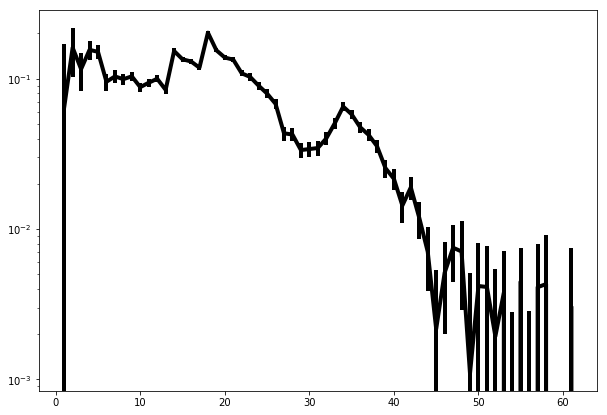

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(10,7))
plt.errorbar(ch,rate,yerr=err,linewidth=4,color='black')
plt.yscale('log')

In [14]:
from astropy.io import fits

hdul = fits.open('NGC2110_spectrum.fits', mode='update')
hdr=hdul[1].header
hdr.set('EXPOSURE', tot_expos)
spec=hdul[1].data
spec['RATE']=rate
spec['SYS_ERR']=syst
spec['STAT_ERR']=err
hdul.flush()
hdul.close()
hdul = fits.open('NGC2110_rmf.fits.gz', mode='update')
rmf=hdul[2].data
rmf['MATRIX']=matrix
hdul.flush()
hdul.close()
hdul = fits.open('NGC2110_arf.fits.gz', mode='update')
arf=hdul[1].data
arf['SPECRESP']=specresp
hdul.flush()
hdul.close()
print tot_expos

2581598.08366


In [ ]:
import xspec
from xspec import *
Plot.device = "/xs"
s = xspec.Spectrum("NGC2110_spectrum.fits")
s.response ='NGC2110_rmf.fits.gz'
s.response.arf = 'NGC2110_arf.fits.gz'